# TPM034A Machine Learning for socio-technical systems
## `Mini-project #2: Predicting Innovative Outcomes of Applied Research Projects in the NL`

**Delft University of Technology**<br>
**Q2 2023**<br>
**Module manager:** Dr. Sander van Cranenburgh <br>
**Instructors:** Dr. Sander van Cranenburgh, Dr. Giacomo Marangoni, Dr. Amir Pooyan Afghari <br>
**TAs:**  Francisco Garrido Valenzuela & Lucas Spierenburg <br>

## `Learning objectives:`
This mini-project addresses LO3, LO4, LO5 and LO6 in the course.

After the course, students can:
1. explain fundamental concepts of machine learning (ML).
2. conceptually explain the workings of a selected number of ML models and eXplainable AI (XAI) techniques, and apply these to empirical data.
3. **identify applications of ML and XAI techniques in real-world socio-technical systems**
4. **examine the impact of ML-based solutions and interventions on individuals, organisations, and society through XAI.**
5. **conduct an in-depth analysis of a real-world socio-technical challenge, by applying ML and XAI to empirical data.**
6. **reflect on the strengths and limitations of ML and XAI in real-world socio-technical systems.**

## `Project description` <br>

### **Introduction**
The Dutch government has an array of funding schemes available to foster knowledge production in the Netherlands. One of these schemes focuses on addressing the Dutch “knowledge paradox”: Despite the country’s strong science foundation, companies perform relatively weakly in research & development. The scheme addresses this issue by explicitly requiring funding applicants to set up a committee consisting of members from industry to discuss the potential applicability of (intermediate) findings and steer the research process. The underlying idea is that involving (potential) users like this will increase the likelihood of a project that generates innovative outcomes. However, considerable debate exists on how to organize such committees most effectively. Should members, for example, have a diverse technological background or not? Should the selection favour those project leaders who are more experienced? And what about the organization of the networks in which these projects become embedded because of inter-project links?
The objective of this mini-project is to investigate whether a research project's innovative outcome can be predicted using data on the project network characteristics.

### **Data**
You have access to the following data:
1.	Project network characteristics for research projects in the Netherlands,
2.	The final innovative outcomes of projects based on the extent to which the project generated a product.
The file 'data descrition.pdf' provides a brief explanation of the data.

### **Tasks and grading**
There are 8 tasks in this project. In total, 10 points can be earned for these 8 tasks. The weight per task is shown below.

1.	**Data preparation**: prepare the data and separate training and testing data, handle the missing data, handle outliers [1 point]
2.	**Data discovery and visualisation**: investigate the distribution of variables, the correlation between variables, etc. [1 point]
3.	**Selection and application of a proper analytical technique**: create a regression or a machine learning model to predict the innovative outcome of the projects [1 point]
4.	**Model evaluation and output visualization**: evaluate the prediction ability of the selected model(s) [1 point]
5.	**Model explanation**: Identify top 5 features that have the most contribution to innovative outcome of the projects [1 point]
6.	Name two analytical strengths and two analytical limitations of your selected model and data to predict aggression levels [2 points]
7.	Discuss the societal impact of these analytical strengths and limitations on individuals, organisations, and society [2 points]
8.	Propose a potential analytical solution (related to model or data) for mitigating the most severe limitation [1 point]



### **Grading criteria:**
For the first five tasks:
- Correctness of methods and techniques (45%)
- Completeness (45%)
- Coding skills (10%)

For task 6, 7, 8:
- Depth of critical thinking and creativity (60%)
- Completeness (40%)


### **Submission**
When you finish the project, please submit the Jupyter Notebook file of your work to Brightspace and prepare a final presentation (including the results of the tasks) to be delivered on the presentations day.
This project is a group project and so each group must submit one Jupyter Notebook file. However, it is expected that all members of the group contribute to the project and so they all must participate in the final presentation.

The deadline for submission is **11/01/2024**.

In [1]:
# project setup
!git clone https://github.com/TPM034A/Q2_2023
!pip install -r Q2_2023/requirements_colab.txt
!mv "/content/Q2_2023/Mini_projects/Innovation Outcomes/data" /content/data

# install shap
!pip install shap

Cloning into 'Q2_2023'...
remote: Enumerating objects: 275, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 275 (delta 48), reused 89 (delta 36), pack-reused 159
Receiving objects: 100% (275/275), 96.69 MiB | 16.85 MiB/s, done.
Resolving deltas: 100% (94/94), done.
Updating files: 100% (77/77), done.


In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# utils
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# models
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix

# shap
import shap


pd.set_option('display.max_columns', None)

## 1. Read data


In [105]:
# read data
data = pd.read_csv("data/data.csv")
print(data.shape)
data.head()

(555, 16)


,Project_id,project_outcomes,technoogical_field,year,network_density,network_degree_centralization,network_diameter,network_clustering,network_reach,research_location,technological_diversity,geographical_diversity,project_leader_experience,member_relational_experience,funds,project_joint_members
0,1,1,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Wageningen Universiteit,0.357143,0.266667,1,0,225.97,0.18
1,2,0,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Vrije Universiteit Amsterdam,0.428571,0.200000,0,0,545.00,0.16
2,3,1,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Wageningen Universiteit,1.000000,1.000000,0,0,262.36,0.08
3,4,1,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Wageningen Universiteit,0.214286,0.266667,0,0,477.71,0.18
4,5,1,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Vrije Universiteit Amsterdam,1.000000,0.000000,0,0,496.10,0.30


In [106]:
# check nun vals in each col
data.isnull().sum()

Project_id                       0
project_outcomes                 0
technoogical_field               0
year                             0
network_density                  0
network_degree_centralization    0
network_diameter                 0
network_clustering               0
network_reach                    0
research_location                0
technological_diversity          0
geographical_diversity           0
project_leader_experience        0
member_relational_experience     0
funds                            0
project_joint_members            0
dtype: int64

## 2. Data discovery and visualisation


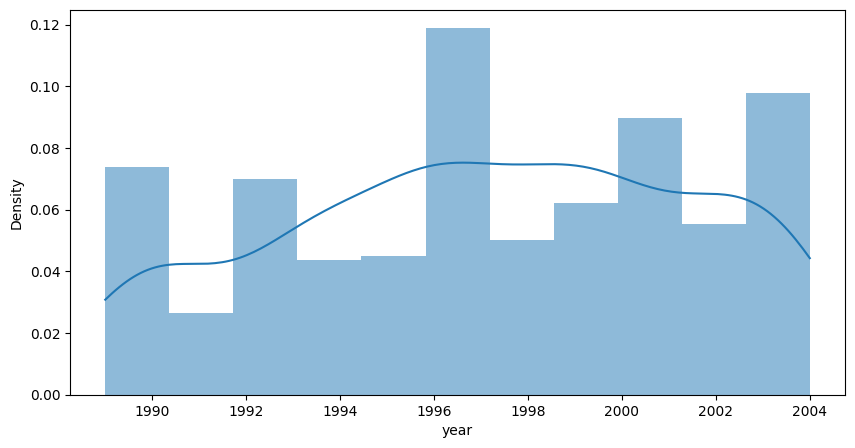

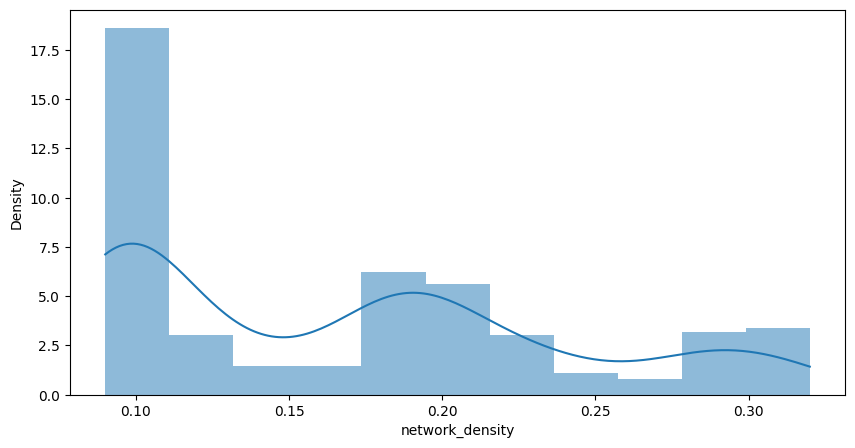

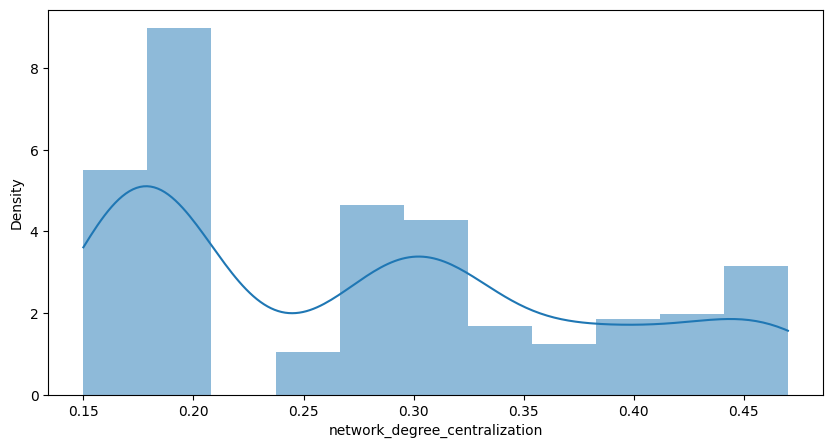

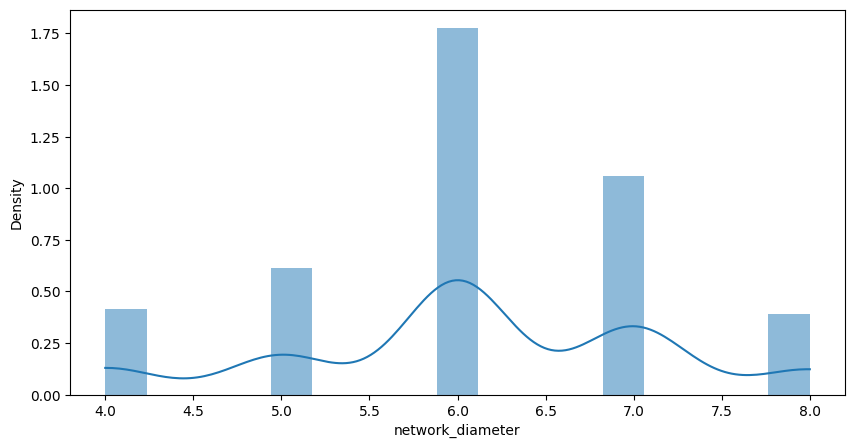

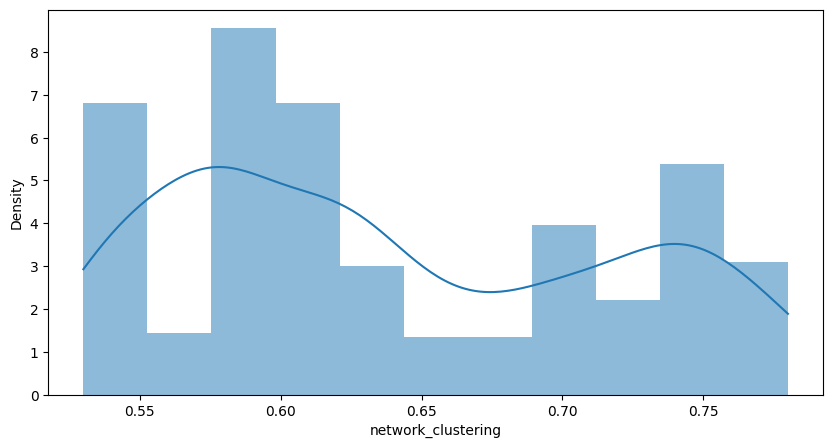

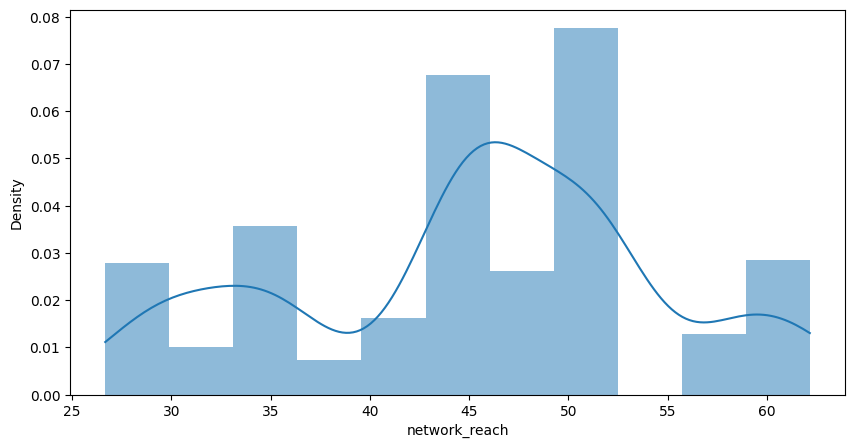

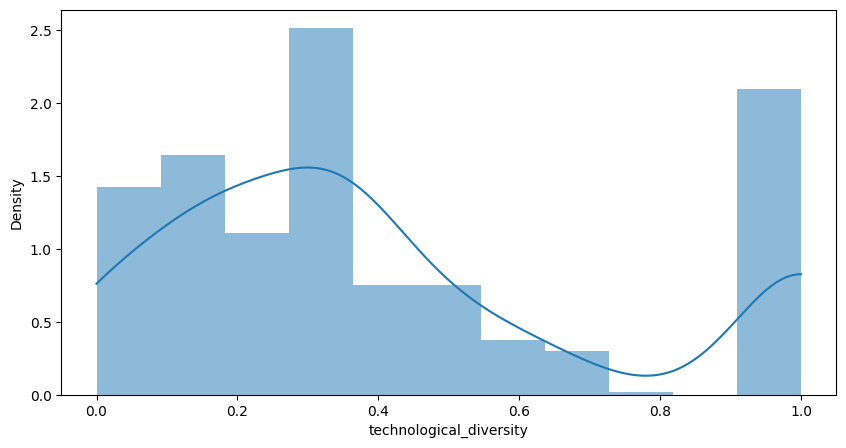

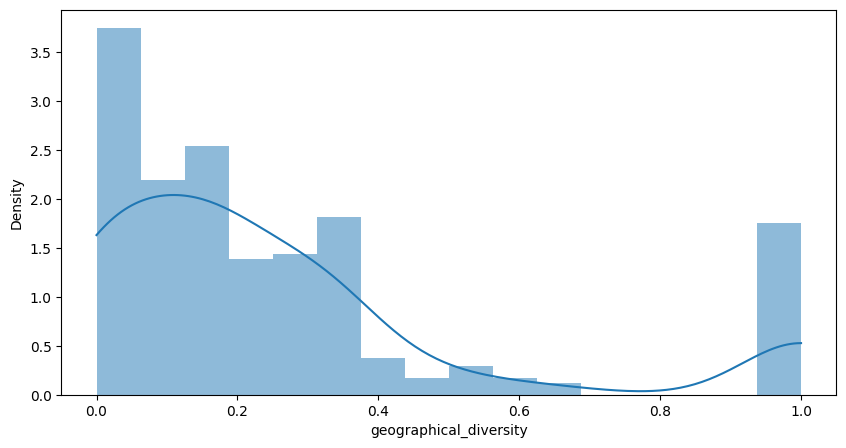

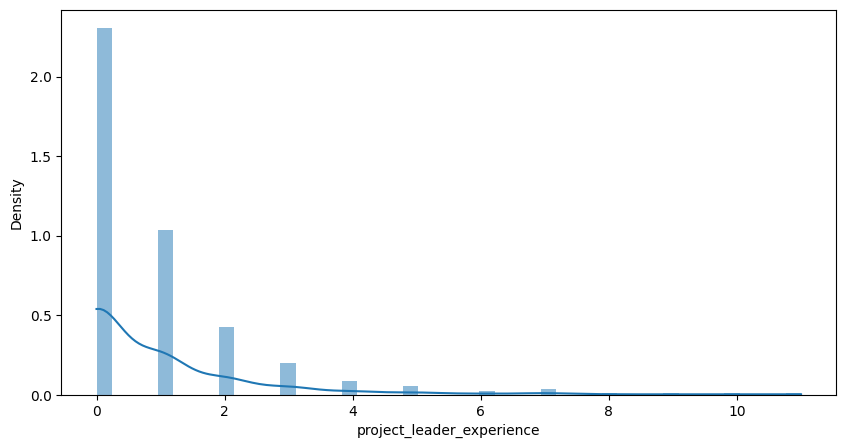

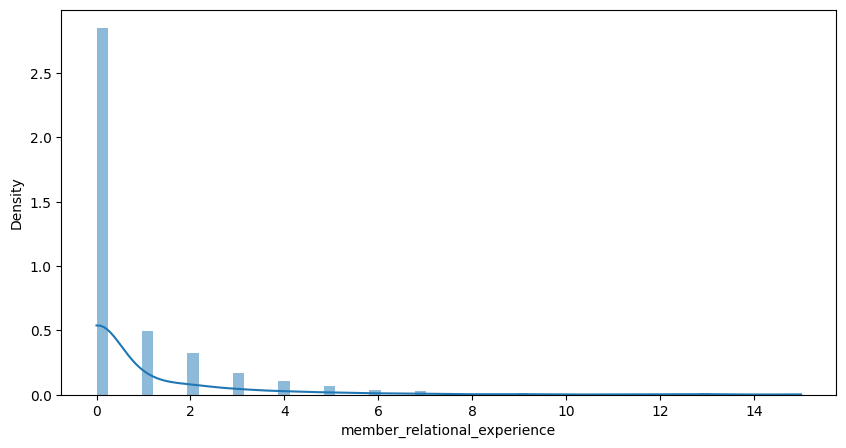

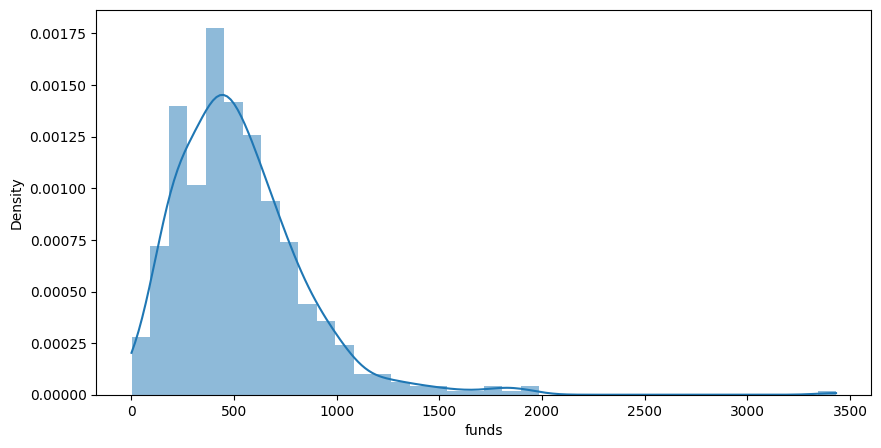

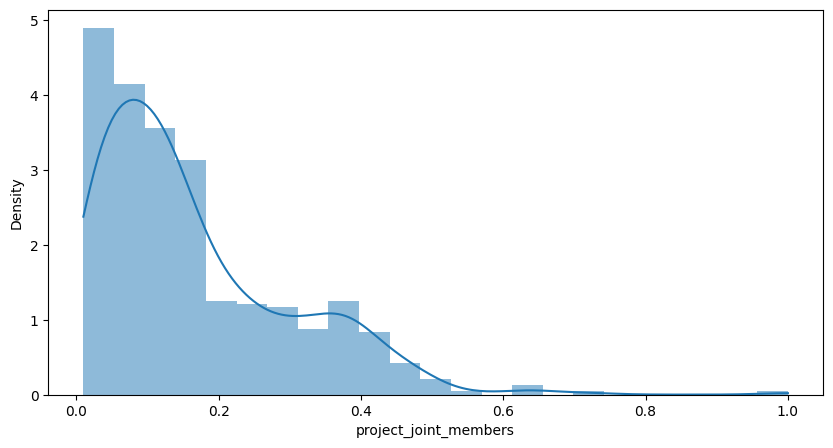

In [107]:
# Investigate the distribution of variables data
# distribution of independent variables
skip_cols = ['Project_id', 'research_location', 'project_outcomes', 'technoogical_field']
cols = [col for col in data.columns if col not in skip_cols]

for col in cols:
  plt.figure(figsize=(10,5))
  sns.histplot(data[col], kde=True, stat="density", linewidth=0)
  plt.show()

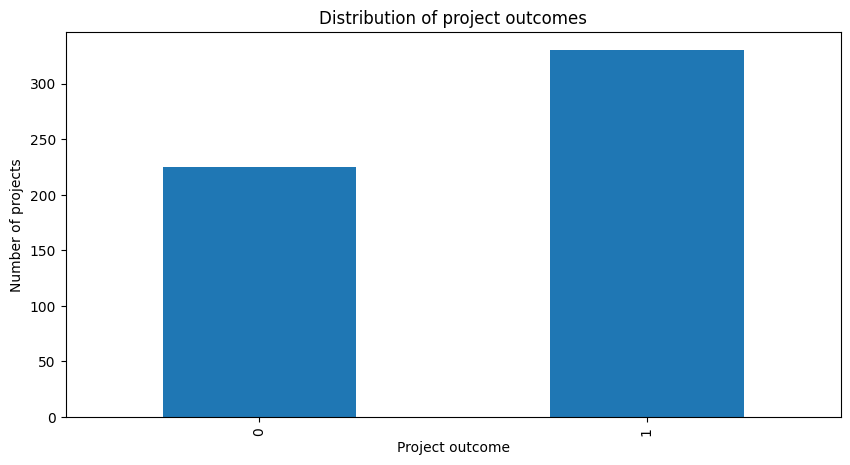

In [108]:
# distribution of dependent var - project outcome
# we can see an imbalance in data
grouped_data = data.groupby("project_outcomes")["Project_id"].count()
grouped_data.plot(kind='bar', figsize=(10, 5))

plt.title('Distribution of project outcomes')
plt.xlabel('Project outcome')
plt.ylabel('Number of projects')
plt.show()

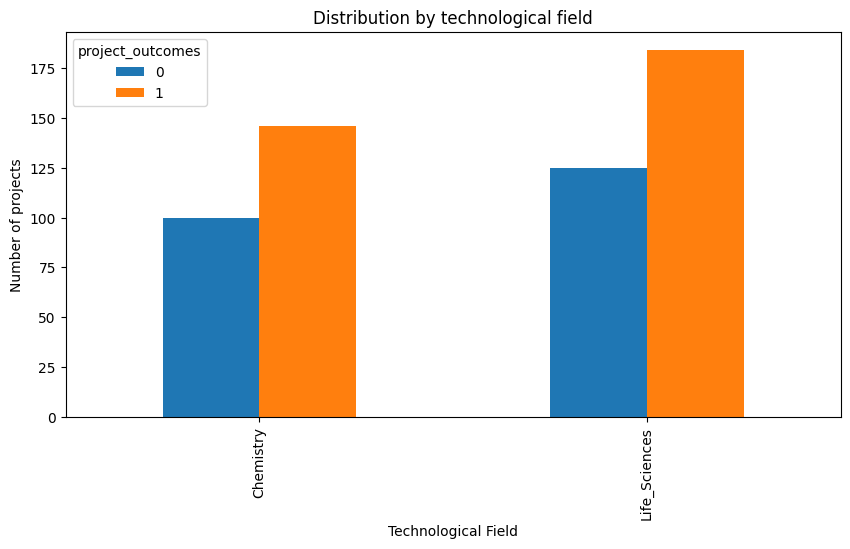

In [109]:
# Plot the distribution of Chemistry and Life Sciences & its success
grouped_data = data.groupby(["technoogical_field", "project_outcomes"])["Project_id"].count().unstack()
grouped_data.plot(kind='bar', figsize=(10, 5))

plt.title('Distribution by technological field')
plt.xlabel('Technological Field')
plt.ylabel('Number of projects')
plt.show()

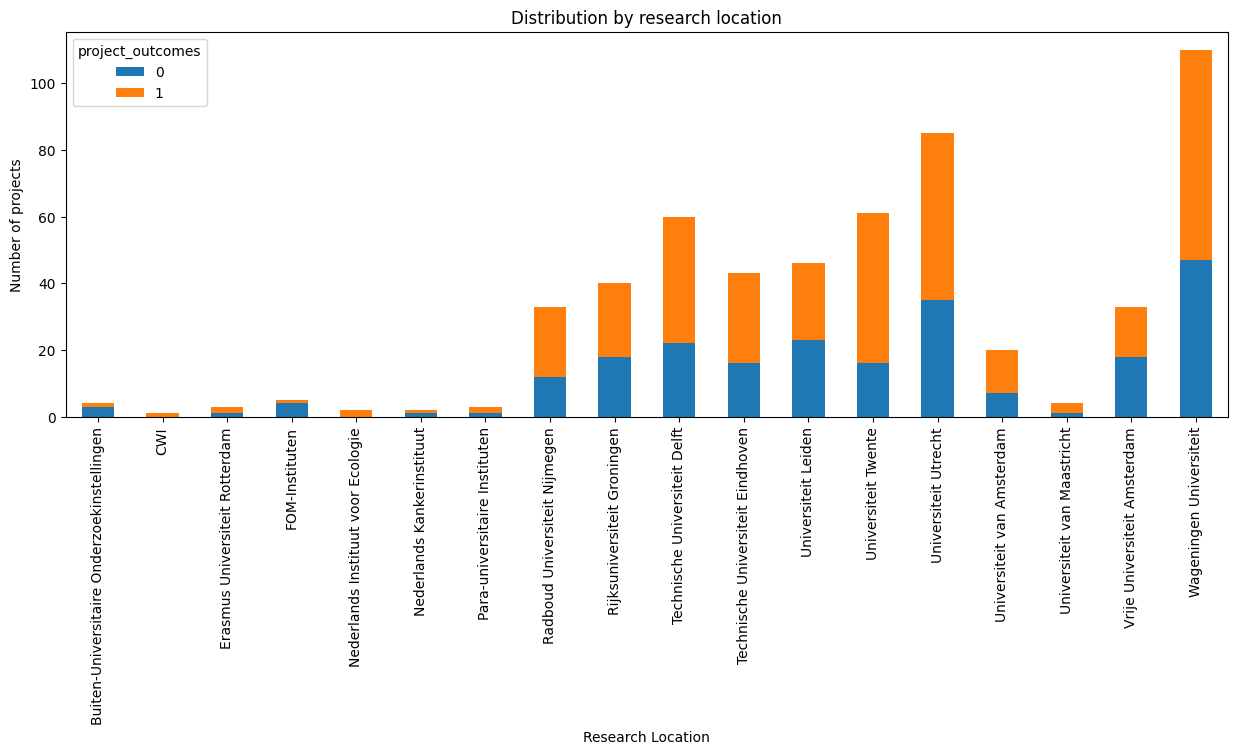

In [110]:
# Plot the distribution of research location
grouped_data = data.groupby(["research_location", "project_outcomes"])['Project_id'].count().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.title('Distribution by research location')
plt.xlabel('Research Location')
plt.ylabel('Number of projects')
plt.show()

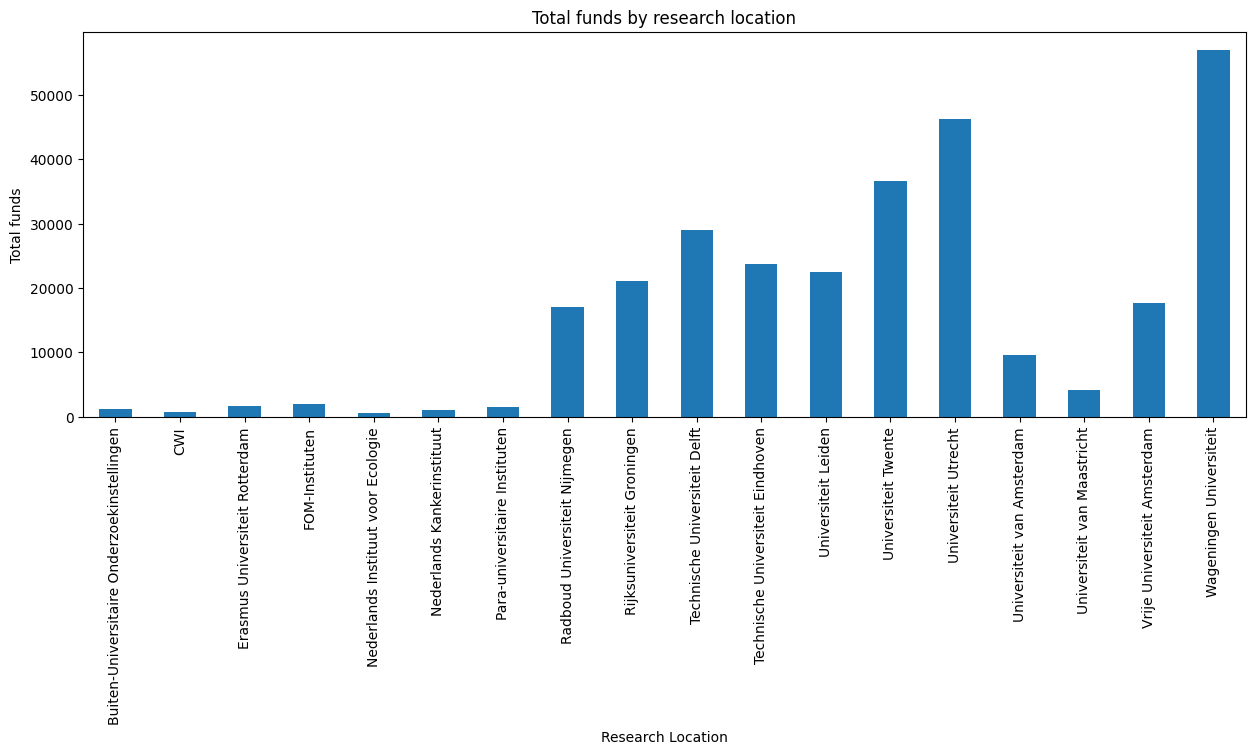

In [111]:
# funds by research loc
grouped_data = data.groupby(["research_location"])["funds"].sum()
grouped_data.plot(kind='bar', figsize=(15, 5))
plt.title('Total funds by research location')
plt.xlabel('Research Location')
plt.ylabel('Total funds')
plt.show()

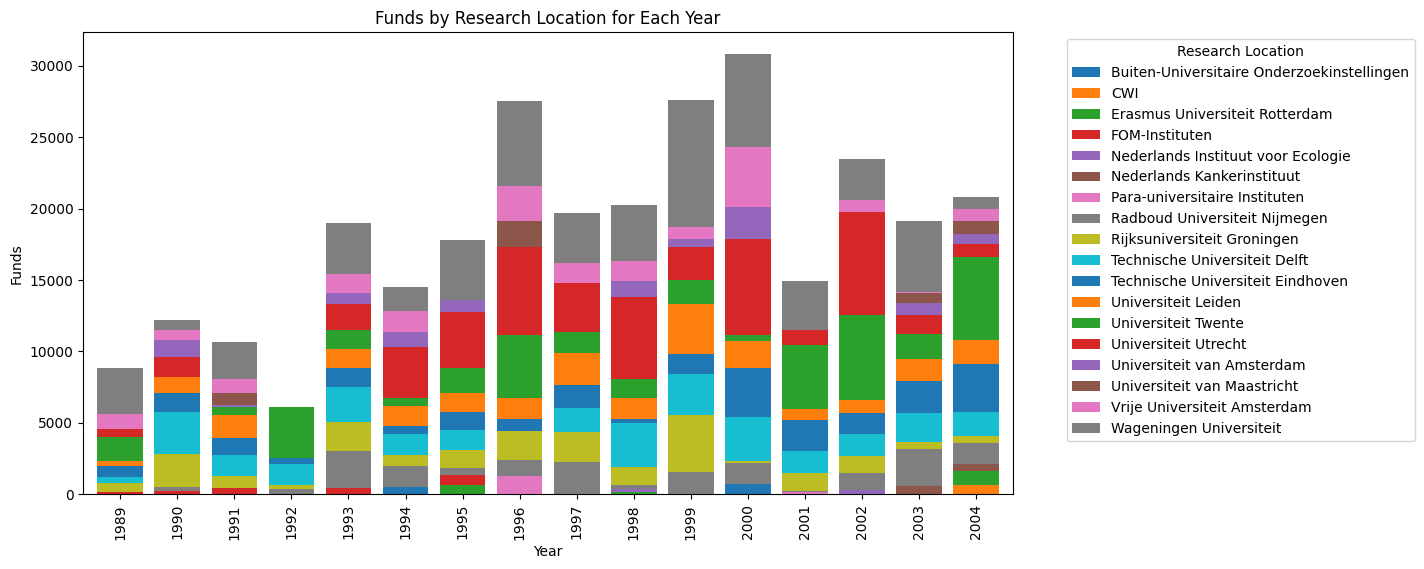

In [112]:
# Funds by year and research loc
grouped_data = data.groupby(["year", "research_location"])["funds"].sum().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8)

plt.title('Funds by Research Location for Each Year')
plt.xlabel('Year')
plt.ylabel('Funds')
plt.legend(title='Research Location', bbox_to_anchor=(1.05, 1), loc='upper left')

In [113]:
def encode_data(data):
  # encode categorical vars
  cat_vars = ['technoogical_field', 'research_location']
  encoded_data = pd.get_dummies(data, columns=cat_vars)
  return encoded_data


# correlation of vars
def plot_heatmap(df):
  # heatmap of correlations
  fig, axes = plt.subplots(figsize=(20, 10))
  fig.set_tight_layout(True)

  corr = df.corr()
  corr_mask = np.triu(np.ones_like(corr, dtype=bool))
  corr_cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, mask = corr_mask, cmap=corr_cmap, annot=False,square = True, linewidths=.5, ax = axes)
  return corr

geographical_diversity                                         -0.098494
research_location_FOM-Instituten                               -0.076630
research_location_Vrije Universiteit Amsterdam                 -0.071721
project_joint_members                                          -0.068136
research_location_Buiten-Universitaire Onderzoekinstellingen   -0.059801
research_location_Universiteit Leiden                          -0.057920
technological_diversity                                        -0.056990
network_diameter                                               -0.051261
research_location_Rijksuniversiteit Groningen                  -0.025314
research_location_Wageningen Universiteit                      -0.022144
network_clustering                                             -0.020493
research_location_Nederlands Kankerinstituut                   -0.011587
network_density                                                -0.007022
network_degree_centralization                      

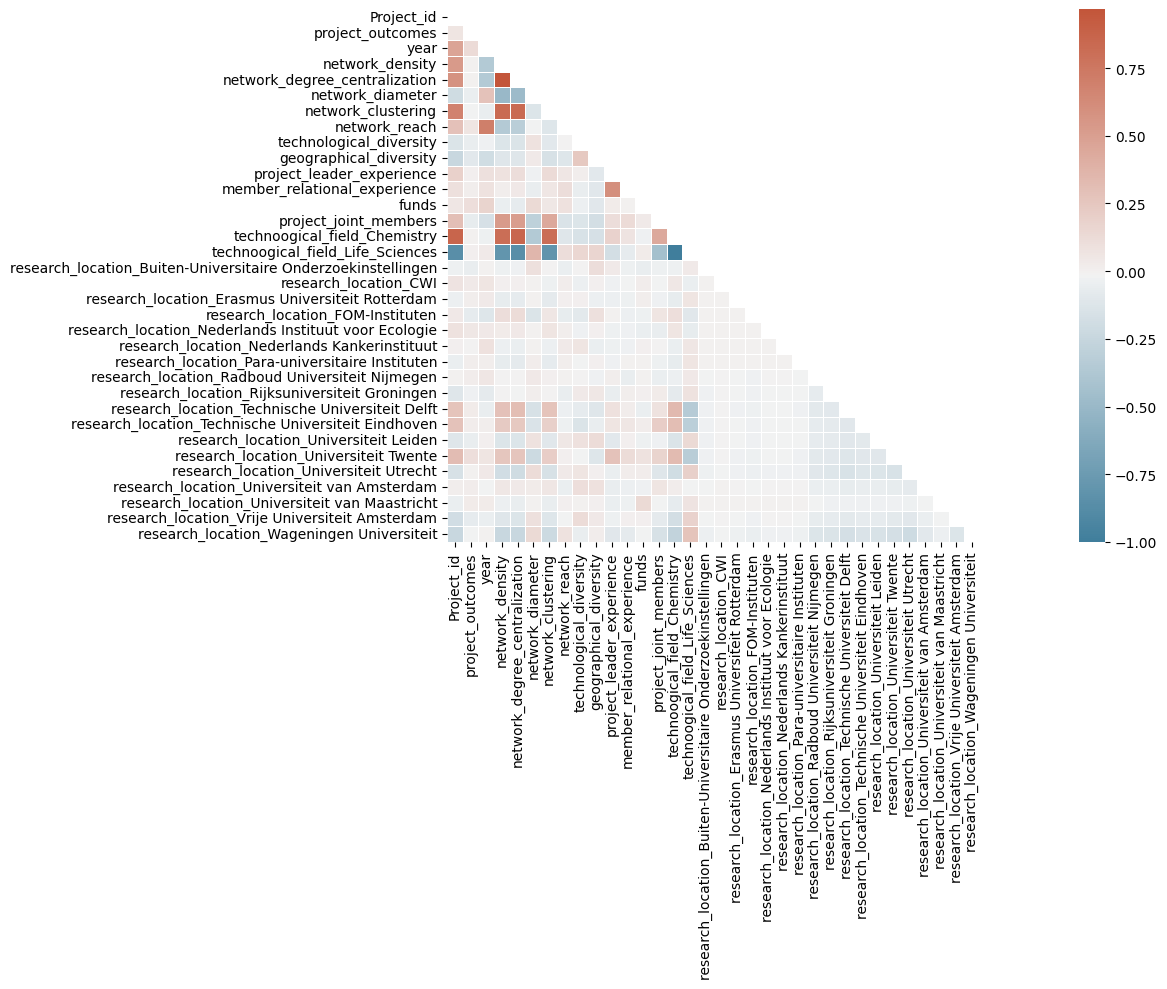

In [114]:
# corr of project outcome with other vars
encoded_data=encode_data(data)
corr = plot_heatmap(encoded_data)
corr['project_outcomes'].sort_values()

## 3. Data preparation

In [164]:
random_seed = 42

def balance_data_oversampling(data):
  # balance the imbalance data using oversampling technique

  # the data is imbalanced. we need to tackle that by either undersampling or oversampling.
  # upsample minority class
  df_minority = data[(data['project_outcomes']== 0)]
  df_majority = data[(data['project_outcomes']== 1)]
  df_minority_upsampled = resample(df_minority,
                                  replace=True,    # sample with replacement
                                  n_samples= 330,  # to match majority class
                                  random_state=42)  # reproducible results

  # Combine majority class with upsampled minority class
  processed_data = pd.concat([df_minority_upsampled, df_majority])
  return processed_data

# seperate training and test data
def get_training_data(X, features, scale_data=False):
  X = X.copy()

  if scale_data:
    scaler = StandardScaler()
    X[features] = scaler.fit_transform(X[features])

  X_train, X_test, Y_train, Y_test = train_test_split(X[features], X[predict], test_size=0.20, random_state = random_seed)
  print("Training data:", X_train.shape, Y_train.shape)
  print("Test data:", X_test.shape, Y_test.shape)
  return X_train, X_test, Y_train, Y_test

Text(0, 0.5, 'Number of projects')

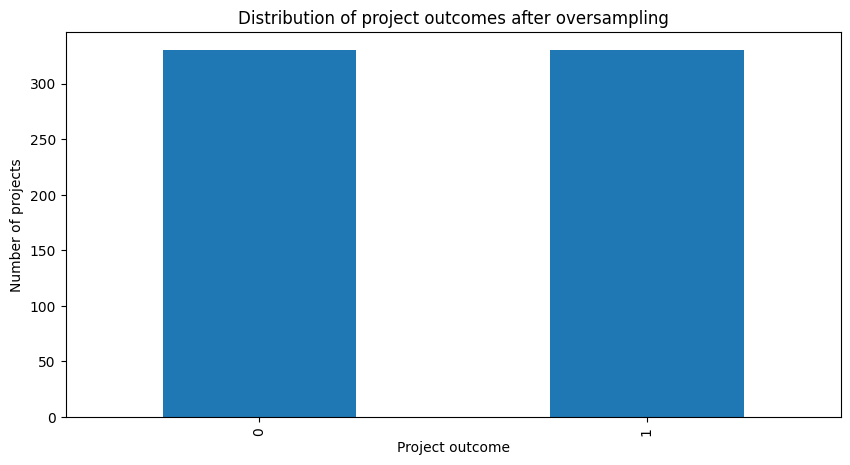

In [165]:
balanced_data = balance_data_oversampling(data)

grouped_data = balanced_data.groupby("project_outcomes")["Project_id"].count()
grouped_data.plot(kind='bar', figsize=(10, 5))
plt.title('Distribution of project outcomes after oversampling')
plt.xlabel('Project outcome')
plt.ylabel('Number of projects')

In [166]:
# encode data feautures
encoded_data = encode_data(balanced_data)
# get features
drop_cols = ["Project_id"]
predict = "project_outcomes"
features = [col for col in encoded_data.columns if col != predict]
features = [col for col in features if col not in drop_cols]
features

['year',
 'network_density',
 'network_degree_centralization',
 'network_diameter',
 'network_clustering',
 'network_reach',
 'technological_diversity',
 'geographical_diversity',
 'project_leader_experience',
 'member_relational_experience',
 'funds',
 'project_joint_members',
 'technoogical_field_Chemistry',
 'technoogical_field_Life_Sciences',
 'research_location_Buiten-Universitaire Onderzoekinstellingen',
 'research_location_CWI',
 'research_location_Erasmus Universiteit Rotterdam',
 'research_location_FOM-Instituten',
 'research_location_Nederlands Instituut voor Ecologie',
 'research_location_Nederlands Kankerinstituut',
 'research_location_Para-universitaire Instituten',
 'research_location_Radboud Universiteit Nijmegen',
 'research_location_Rijksuniversiteit Groningen',
 'research_location_Technische Universiteit Delft',
 'research_location_Technische Universiteit Eindhoven',
 'research_location_Universiteit Leiden',
 'research_location_Universiteit Twente',
 'research_locatio

## 4. Selection and application of a proper analytical technique

Create a regression or a machine learning model to predict the innovative outcome of the projects [1 point]

In [167]:
def eval_regression_perf(model, X_train, X_test, Y_train, Y_test):
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)

    def perfs(Y, Y_pred):
        mse = mean_squared_error(Y,Y_pred)
        mae = mean_absolute_error(Y,Y_pred)
        R2 = r2_score(Y,Y_pred)
        return mse,mae,R2

    mse_train, mae_train, r2_train = perfs(Y_train, Y_pred_train)
    mse_test,  mae_test , r2_test  = perfs(Y_test,Y_pred_test)

    print('Performance')
    print(f'Mean Squared  Error Train | Test: \t{mse_train:>7.4f}\t|  {mse_test:>7.4f}')
    print(f'Mean Absolute Error Train | Test: \t{mae_train:>7.4f}\t|  {mae_test:>7.4f}')
    print(f'R2                  Train | Test: \t{ r2_train:>7.4f}\t|  {r2_test:>7.4f}\n')



def eval_classifier_perf(mlp, X_train,Y_train,X_test, Y_test):
    def calculate_acc(mlp,X,Y):
        accuracy = mlp.score(X,Y)
        return accuracy

    def calculate_ce(mlp,X,Y):
        prob = mlp.predict_proba(X)
        Y_dummy = pd.get_dummies(Y).to_numpy()
        prob_chosen = np.sum(prob*Y_dummy,axis=1)
        log_prob_chosen = np.log(prob_chosen)
        cross_entropy = -np.sum(log_prob_chosen)/len(Y)
        return cross_entropy

    acc_train = calculate_acc(mlp,X_train,Y_train)
    acc_test  = calculate_acc(mlp,X_test,Y_test)

    ce_train = calculate_ce(mlp,X_train,Y_train)
    ce_test = calculate_ce(mlp,X_test,Y_test)
    print('\t\t Train set\t Test set')
    print(f'Accuracy\t {acc_train:0.3f}\t\t {acc_test:0.3f}')
    print(f'Cross entropy\t {ce_train:0.3f}\t\t {ce_test:0.3f}')

Training data: (528, 32) (528,)
Test data: (132, 32) (132,)
		 Train set	 Test set
Accuracy	 0.991		 0.803
Cross entropy	 0.218		 0.491


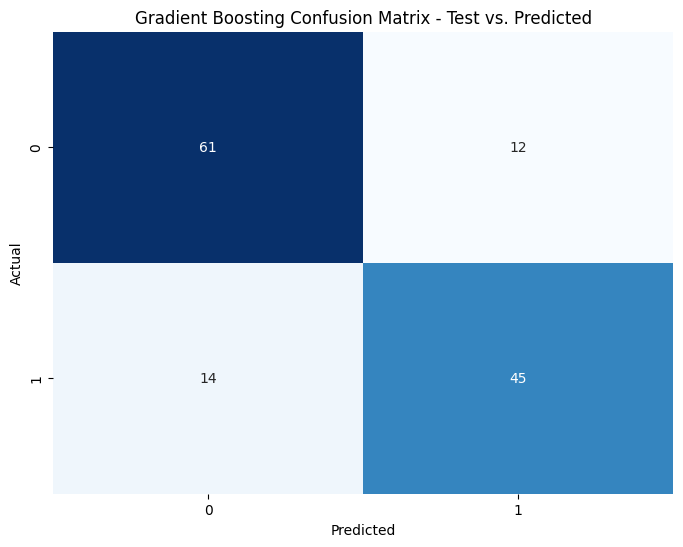

In [190]:
# gradient boosting


# split data
X_train, X_test, Y_train, Y_test = get_training_data(encoded_data, features, scale_data=False)

# train
gb = GradientBoostingClassifier(n_estimators=50,
                                learning_rate=0.1,
                                max_depth=5,
                                random_state=random_seed)

gb.fit(X_train, Y_train)

# evaluate
eval_classifier_perf(gb, X_train, Y_train, X_test, Y_test)

# confusion matrix
y_pred = gb.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gradient Boosting Confusion Matrix - Test vs. Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Training data: (528, 32) (528,)
Test data: (132, 32) (132,)
		 Train set	 Test set
Accuracy	 0.994		 0.780
Cross entropy	 0.271		 0.490


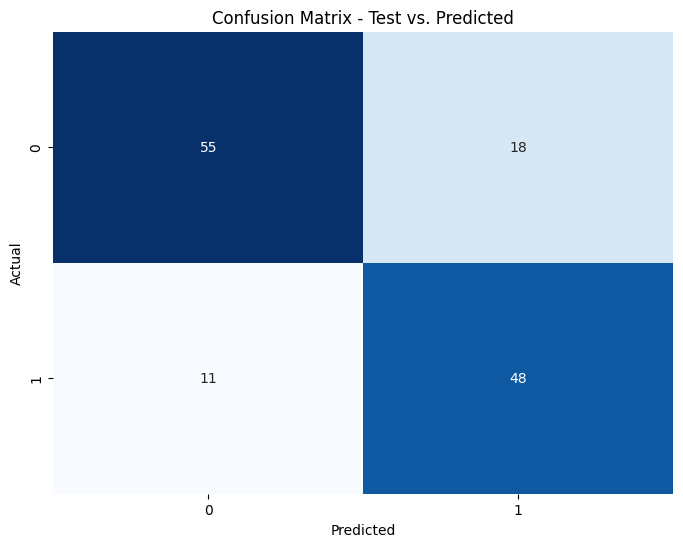

In [168]:
# random forest classifier

# split data
X_train, X_test, Y_train, Y_test = get_training_data(encoded_data, features, scale_data=False)

# train
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=random_seed)
rfc.fit(X_train, Y_train)

# evaluate
eval_classifier_perf(rfc, X_train, Y_train,X_test, Y_test)

# confusion matrix
y_pred = rfc.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test vs. Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Training data: (528, 32) (528,)
Test data: (132, 32) (132,)
		 Train set	 Test set
Accuracy	 0.915		 0.750
Cross entropy	 0.227		 0.893


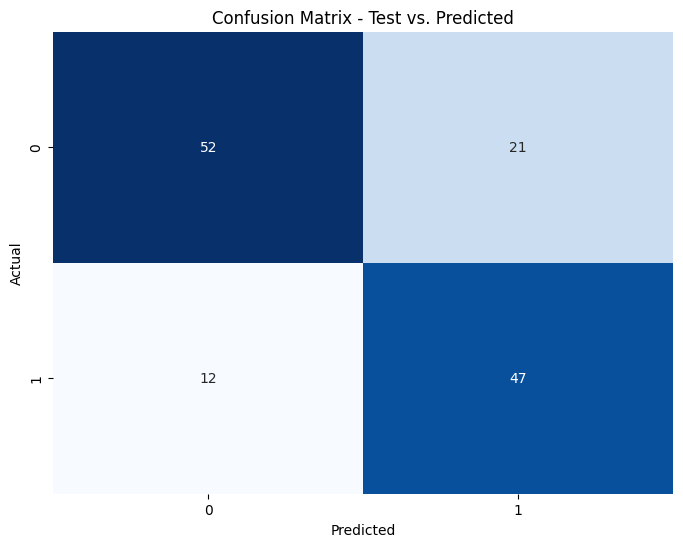

In [174]:
# mlp

# scaled data
X_train, X_test, Y_train, Y_test = get_training_data(encoded_data, features, scale_data=True)


layers = (45, 45)
lr = 0.1
alpha = 0.1

mlp_gs = MLPClassifier(hidden_layer_sizes = layers,
                       learning_rate_init = lr,
                       alpha=alpha,
                       solver='adam',
                       activation = 'tanh',
                       max_iter = 2000,
                       early_stopping=True,
                       random_state=42)

# train
mlp_gs.fit(X_train, Y_train)
# evaluate
eval_classifier_perf(mlp_gs, X_train, Y_train,X_test, Y_test)


# cm
y_pred = mlp_gs.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test vs. Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 6. Model evaluation and output visualization

Evaluate the prediction ability of the selected model(s) [1 point]

## 7. Model explanation

Identify top 5 features that have the most contribution to innovative outcome of the projects [1 point]

In [192]:
# compute the SHAP values
explainer = shap.Explainer(gb.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 133it [00:14,  4.80it/s]


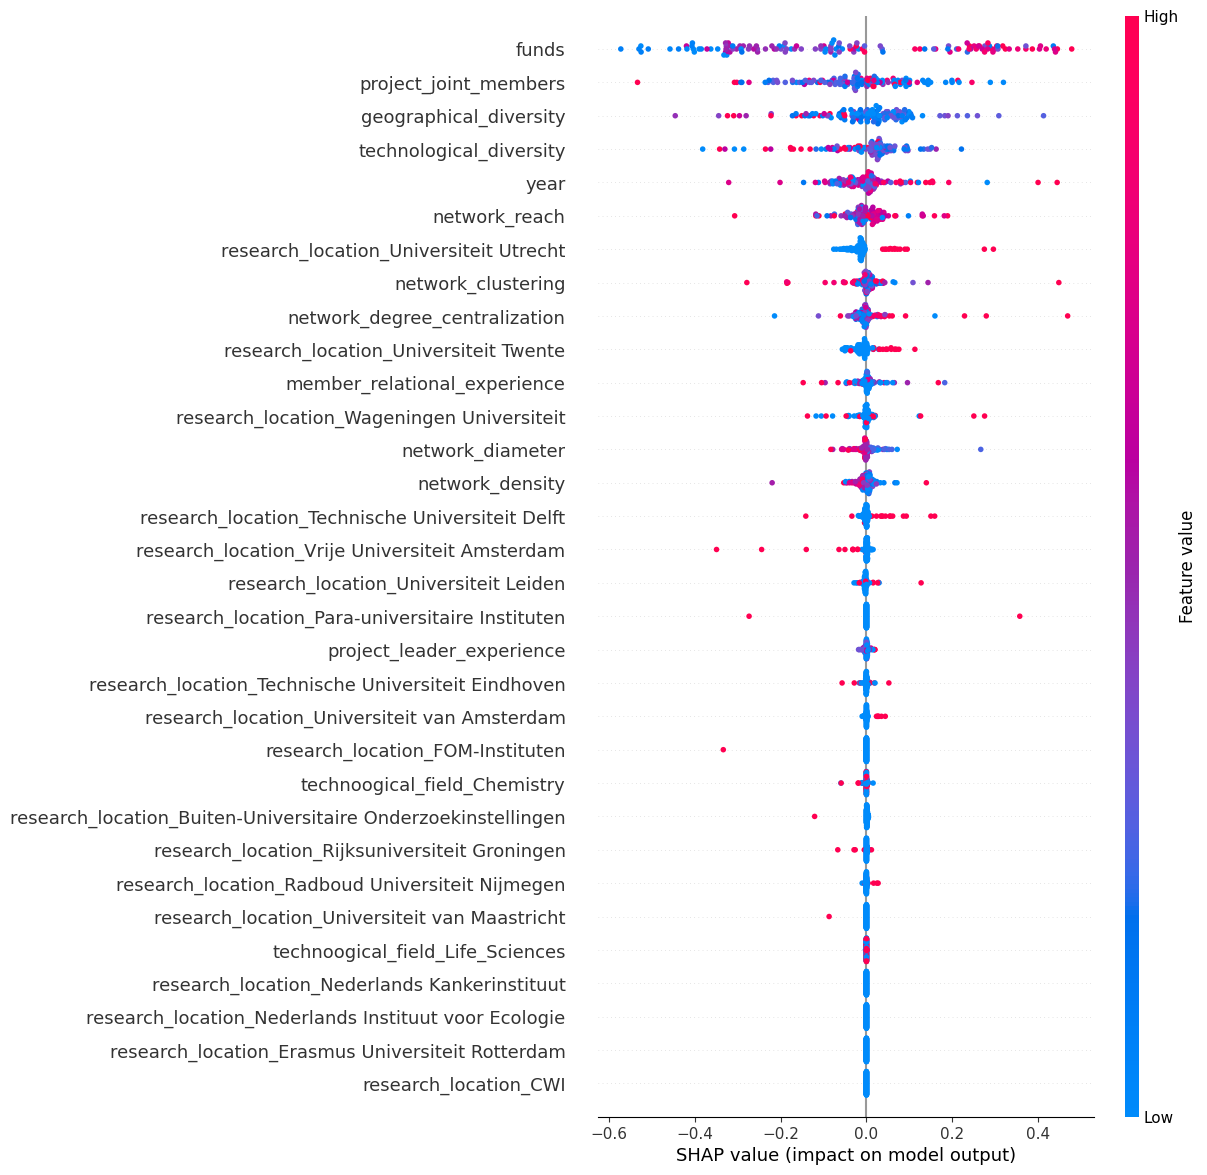

In [193]:
# plot the SHAP values for each feature and test sample
shap.plots.beeswarm(shap_values, max_display=50)

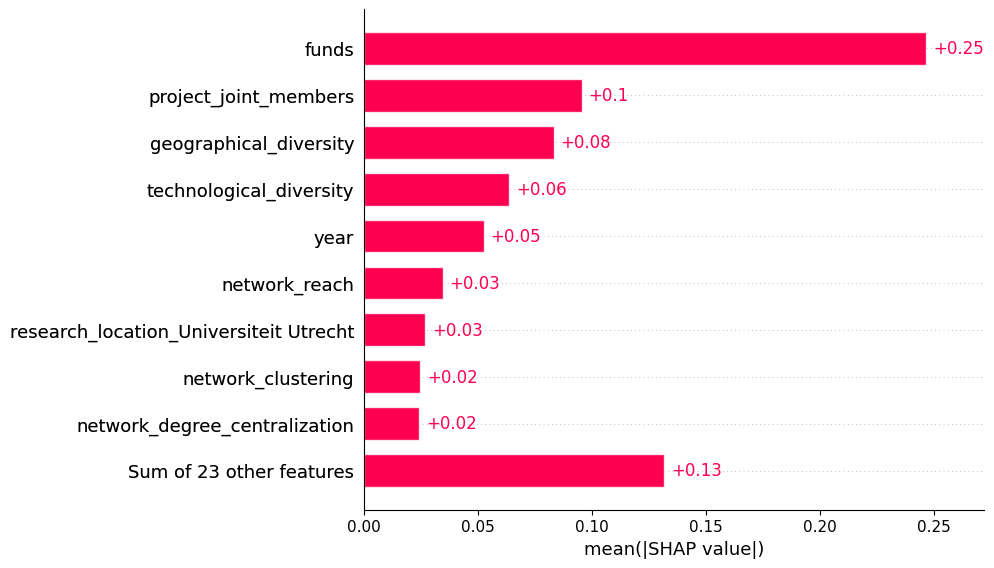

In [194]:
# 5 most predictive features
shap.plots.bar(shap_values)

## 8. Name two analytical strengths and two analytical limitations of your selected model and data to predict aggression levels [2 points]

## 9. Discuss the societal impact of these analytical strengths and limitations on individuals, organisations, and society [2 points]

## 10. Propose a potential analytical solution (related to model or data) for mitigating the most severe limitation [1 point]